In [18]:
import keras

In [19]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

tf.keras.backend.set_session(sess)

In [20]:
#匯入資料
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [21]:
#定義資料前處理函數
def preproc_x(x, flatten = True):
    x = x/255
    if flatten:
        x = x.reshape(len(x),-1)
    return x
def preproc_y(y, numclasses=10):
    y = keras.utils.to_categorical(y,numclasses)
    return y

In [22]:
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [28]:
#定義模型函示
def build_model(input_shape, output_unit=10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_unit, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_unit, activation='relu', name='hidden_layer'+str(i+1))(x)
        
    out = keras.layers.Dense(units=output_unit, activation='softmax', name ='out')(x)
        
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
        
    return model

In [29]:
#hyperparameters setting
learning_rate = [1e-1,1e-2,1e-3,1e-4,1e-5]
epochs = 50
batch_size = 256
momentum = 0.95

In [36]:
result = {}
#使用迴圈，建立不同的learning rate
for lr in learning_rate:
    keras.backend.clear_session()#把舊的Graph清掉
    print('Experiment with learing rate = %.6f'%(lr))
    model = build_model(input_shape=x_train.shape[1:])
    model.summary()
    opt = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    model.fit(x_train, y_train, epochs=epochs, batch_size= batch_size, 
              validation_data=(x_test, y_test), shuffle=True)
    #collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['acc']
    valid_acc = model.history.history['val_acc']
    
    exp_name_tag = 'exp-lr-%s'%str(lr)
    result[exp_name_tag] = {'train-loss':train_loss,
                            'valid-loss':valid_loss,
                            'train-acc':train_acc,
                            'valid-acc':valid_acc}

Experiment with learing rate = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
out (Dense)                  (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.8360 - acc: 0.3414 - val_loss: 1.6930 - val_acc: 0.4006
Epoch 2/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6089 - acc: 0.4299 - val_loss: 1.5739 - val_acc: 0.4357
Epoch 3/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5133 - acc: 0.4604 - val_loss: 1.5058 - val_acc: 0.4663
Epoch 4/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.4518 - acc: 0.4834 - val_loss: 1.5008 - val_acc: 0.4701
Epoch 5/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.4095 - acc: 0.5015 - val_loss: 1.4395 - val_acc: 0.4847
Epoch 6/50
50000/50000 [==============================] - 5s 95us/step - loss: 1.3671 - acc: 0.5130 - val_loss: 1.4611 - val_acc: 0.4826
Epoch 7/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.3248 - acc: 0.5285 - val_loss: 1.4143 - val_acc

50000/50000 [==============================] - 5s 92us/step - loss: 1.8229 - acc: 0.3567 - val_loss: 1.7721 - val_acc: 0.3794
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.7314 - acc: 0.3935 - val_loss: 1.6952 - val_acc: 0.4141
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.6699 - acc: 0.4154 - val_loss: 1.6446 - val_acc: 0.4236
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.6234 - acc: 0.4314 - val_loss: 1.6238 - val_acc: 0.4333
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5832 - acc: 0.4443 - val_loss: 1.5763 - val_acc: 0.4529
Epoch 7/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5490 - acc: 0.4579 - val_loss: 1.5525 - val_acc: 0.4563
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.5182 - acc: 0.4675 - val_loss: 1.5444 - val_acc: 0.4555
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 5s 93us/step - loss: 2.0719 - acc: 0.2768 - val_loss: 2.0381 - val_acc: 0.2886
Epoch 4/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0118 - acc: 0.2978 - val_loss: 1.9857 - val_acc: 0.3074
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.9653 - acc: 0.3144 - val_loss: 1.9461 - val_acc: 0.3202
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.9292 - acc: 0.3276 - val_loss: 1.9152 - val_acc: 0.3332
Epoch 7/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.8998 - acc: 0.3356 - val_loss: 1.8886 - val_acc: 0.3472
Epoch 8/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.8753 - acc: 0.3463 - val_loss: 1.8662 - val_acc: 0.3493
Epoch 9/50
50000/50000 [==============================] - 5s 94us/step - loss: 1.8550 - acc: 0.3519 - val_loss: 1.8479 - val_acc: 0.3566
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 5s 92us/step - loss: 2.2290 - acc: 0.1742 - val_loss: 2.2191 - val_acc: 0.1839
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.2112 - acc: 0.1858 - val_loss: 2.2027 - val_acc: 0.1931
Epoch 6/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.1957 - acc: 0.1955 - val_loss: 2.1880 - val_acc: 0.2038
Epoch 7/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.1816 - acc: 0.2036 - val_loss: 2.1743 - val_acc: 0.2130
Epoch 8/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.1683 - acc: 0.2116 - val_loss: 2.1612 - val_acc: 0.2207
Epoch 9/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.1557 - acc: 0.2184 - val_loss: 2.1488 - val_acc: 0.2269
Epoch 10/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.1439 - acc: 0.2258 - val_loss: 2.1375 - val_acc: 0.2353
Epoch 11/50
50000/50000 [==========================

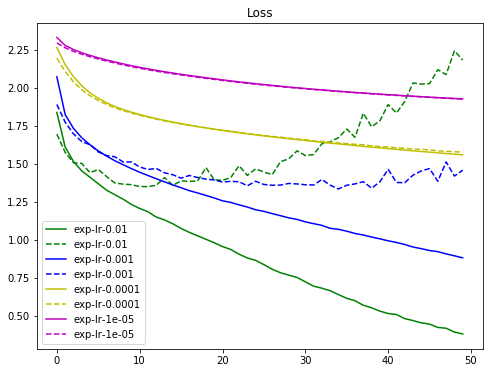

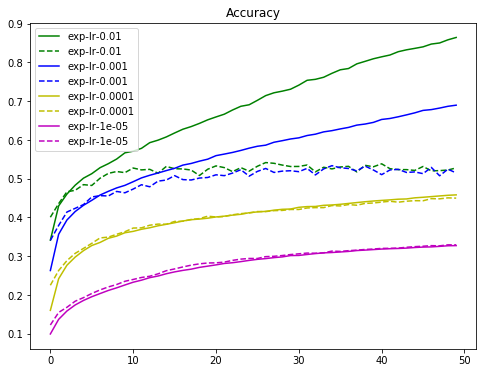

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r','g','b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(result.keys()):
    #由於lr=0.1的loss太大(跟其他人差太多)，會影響到做圖，故先將其拿掉
    if i == 0:
        pass
    else:
        plt.plot(range(len(result[cond]['train-loss'])), result[cond]['train-loss'],'-',label=cond, c = color_bar[i])
        plt.plot(range(len(result[cond]['valid-loss'])), result[cond]['valid-loss'],'--',label=cond, c = color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(result.keys()):
    if i == 0:
        pass
    else:
        plt.plot(range(len(result[cond]['train-acc'])), result[cond]['train-acc'],'-',label=cond, c = color_bar[i])
        plt.plot(range(len(result[cond]['valid-acc'])), result[cond]['valid-acc'],'--',label=cond, c = color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()